Import all the libraries and the dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder

filename="C:\ML\Game_rating.csv"
df=pd.read_csv(filename)

EDA:

Overview of the dataset with the first five features

In [13]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Concise description which tells us the number of non-null entities in each column and the datatype of the columns. We find that there are no null values in the dataset and it consists of two rows with object datatype and the rest of the columns are integers.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

Get the standard statistics of each column, including the count, mean, standard deviation and so on. We find that most of the numerical columns are binary, having only 0s and 1s. This suggests they are boolean.

In [15]:
df.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We check for null values in each column. There are no null values.

In [16]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

We find count of each unique value in target column. We find the 'T' ratings are the most common, followed by E, ET and M.
T - Teen, E - Everyone, ET - Early Ten+, M - Mature. These tell what ages the games are suitable for.

In [17]:
df.iloc[:, -1].value_counts()

esrb_rating
T     689
E     416
ET    403
M     387
Name: count, dtype: int64

Plotting the data we acquired previously in a countplot graph.

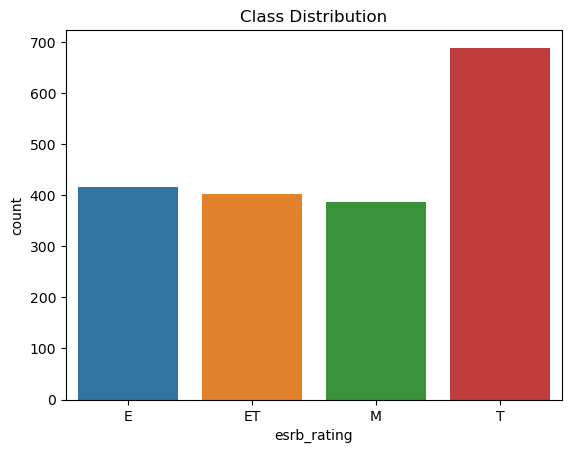

In [18]:
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution")
plt.show()

We drop the title column as it is an object column and cannot be used in the model. We also cannot convert it into numerical values as it has only unique values, thus encoding will create too many unnecessary columns.

We split the data into target data (y) and feature data (x) and also into train and test sets. We also encode the target data(we check if its datatype is object first) using label encoding as we only have 4 unique values. By default label encoder assigns numerical values in alphabetical order, so E, ET, M, T as 0, 1, 2, 3.

In [20]:
df=df.drop(['title'],axis=1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use the StandardScalar to scale the data into a similar range. This makes sure the model does not get biased towards the features with higher values. Since the data is mostly binary, this step doesn't change the data.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Gaussian Naive Bayes - Used when the features are continuous and are assumed to follow a Gaussian (Normal) distribution.

In [22]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb_pred = gnb.predict(X_test_scaled)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")

Gaussian Naive Bayes Accuracy: 57.52%


We get an accuracy of 57%. This means that the model is not very good for this task. This is because the data is not continuous (the data is in binary format and is categorical in nature). Gaussain Naive Bayes is suited for data that is continuous and follow a normal distribution.

Plotting the confusion matrix for this model.

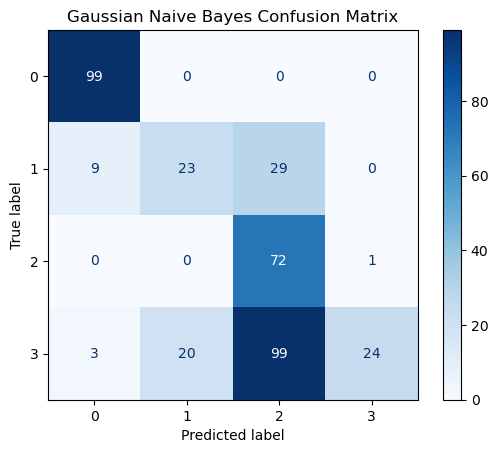

In [23]:
cm_gnb = confusion_matrix(y_test, gnb_pred)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
disp_gnb.plot(cmap=plt.cm.Blues)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

We see from the confusion matrix that the model's predictions for 0 and 2 are quite accurate, but it struggles with predicting 1 and 3. Giving a higher false positive rate for 3.

Multinomial Naive Bayes - Used when the features are discrete and represent counts or frequencies

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy * 100:.2f}%")

Multinomial Naive Bayes Accuracy: 83.11%


We get a higher accuracy with this model, suggesting it's better suited for this dataset. This is because the dataset consists of multiple categorical columns and therefore Multinomal Naive Bayes is a better fit for this dataset as this data is discrete(only 0s and 1s).

Plotting the confusion matrix for the result.

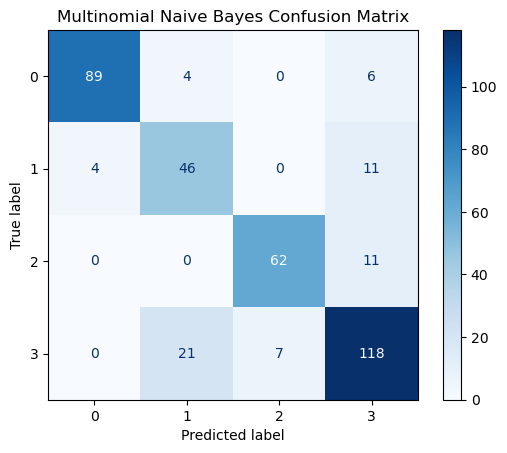

In [25]:
cm_mnb = confusion_matrix(y_test, mnb_pred)
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb)
disp_mnb.plot(cmap=plt.cm.Blues)
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

The diagonal indicates the true value and predicted values are identical. The off-diagonal elements indicate the predicted values are different from the true values. Since majority are in the diagonal, the model is very accurate.

Finding the mean accuracy by cross validation, this is done by making 5 splits and finding the mean accuracy from each individual split

In [26]:
cv_scores_gnb = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (GaussianNB): {cv_scores_gnb}")
print(f"Mean Accuracy (GaussianNB): {np.mean(cv_scores_gnb) * 100:.2f}%")

Cross-Validation Accuracy Scores (GaussianNB): [0.57565789 0.57425743 0.56765677 0.52805281 0.4950495 ]
Mean Accuracy (GaussianNB): 54.81%


We get a mean accuracy of 54%

Finding the ROC curve. Since it is used for binary classification usuallly, we have to make some additional changes.

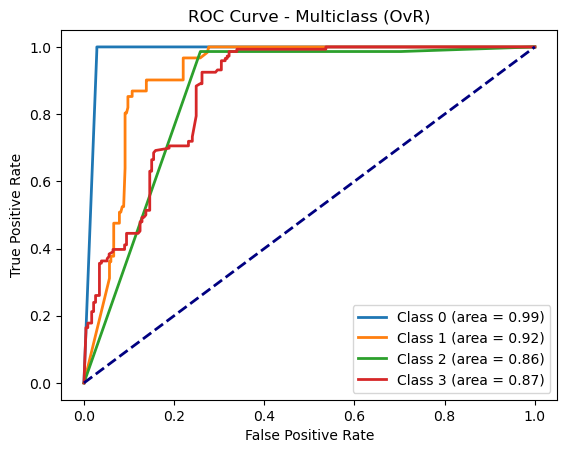

In [33]:
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
gnb_proba = gnb.predict_proba(X_test_scaled)

plt.figure()
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], gnb_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Multiclass (OvR)")
plt.legend(loc="lower right")
plt.show()


The area under the curve tells us the accuracy of the model. Class 0 being the highest and class 3 being the lowest. This suggests there is room for improvement.